### BLM19432E Introduction to Data Science Final Project

Name Surname: MERVE BALCI <br>
Dataset definition:	It allows us to estimate the price of a vehicle using features such as mileage, fuel type, etc. <br>
Dataset source (web address): https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?ref=hackernoon.com&select=Car+details+v3.csv <br>
Aim of the project:	estimating the price of vehicles based on their features

Step0: Project Proposal – 10p 



a)	Find your project data on Kaggle, UCI etc.

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?ref=hackernoon.com&select=Car+details+v3.csv

Vehicle dataset





b)	Explain why you have chosen to work on this data set?

In this data set, there are many features related to vehicles, by using the features here, we can make a vehicle price estimation. Today, millions of people want to buy a vehicle and are looking for it, making this estimation will help everyone.







c)	Do basic exploratory data analysis (EDA) to understand your data.

In [652]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline





In [653]:
vehicleDf = pd.read_csv("Car_details_v3.csv") #to read dataset
vehicleDf

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [654]:
type(vehicleDf) # what the type of the object is

pandas.core.frame.DataFrame

In [655]:
len(vehicleDf) # len of my dataset

8128

In [85]:
vehicleDf.shape # shape of my data set rowxcol

(8128, 13)

In [86]:
vehicleDf.head(3) # first 3 rows of the data 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [87]:
vehicleDf.tail(3)  # last 3 rows of the data 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [88]:
vehicleDf.sample(5)  # sample give as randomly 5 "sample" our dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2322,Fiat Linea 1.3 Active,2011,250000,30000,Diesel,Individual,Manual,First Owner,20.4 kmpl,1248 CC,91.2 bhp,209Nm@ 2000rpm,5.0
1399,Toyota Etios Liva 1.4 GD,2013,270000,52380,Diesel,Dealer,Manual,First Owner,23.59 kmpl,1364 CC,67.04 bhp,170Nm@ 1800-2400rpm,5.0
2488,Ford Endeavour 3.0L 4X2 AT,2012,500000,110000,Diesel,Individual,Automatic,First Owner,11.4 kmpl,2953 CC,153.86 bhp,380Nm@ 2500rpm,7.0
4411,Hyundai i20 2015-2017 Sportz 1.2,2017,675000,5000,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
4231,Honda Amaze V CVT Petrol BSIV,2019,779000,7032,Petrol,Trustmark Dealer,Automatic,First Owner,19.0 kmpl,1199 CC,88.76 bhp,110Nm@ 4800rpm,5.0


In [89]:
vehicleDf.columns # data set's columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [656]:
vehicleDf.nunique(axis=0) # number of unique values for each variable (index/columns)

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [657]:
vehicleDf.name.unique() # unique values of name object

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [658]:
vehicleDf.index # get index of the dataframe

RangeIndex(start=0, stop=8128, step=1)

In [659]:
vehicleDf.dtypes # give data types which have numerical/categorical data

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [660]:
vehicleDf.info() # summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


bazı kolonlarımdaki birimlerden dolayı float değil object olarak gözüküyor önce bunları düzelttim

In [661]:
vehicleDf['mileage']= vehicleDf['mileage'].str.replace('kmpl','')

In [662]:
vehicleDf['mileage']= vehicleDf['mileage'].str.replace('km/kg','')
vehicleDf['mileage']=vehicleDf['mileage'].astype(float)

In [663]:
vehicleDf['engine']= vehicleDf['engine'].str.replace('CC','').astype(float)

In [664]:
vehicleDf['max_power']=vehicleDf['max_power'].str.replace('bhp','')

In [665]:
vehicleDf[['max_power']] = vehicleDf[['max_power']].replace('(-?[^\d\.])', '', regex=True).replace('', float('NaN')).astype(float)

In [666]:
vehicleDf.mileage[vehicleDf.mileage == ""] = None
vehicleDf.engine[vehicleDf.engine == ""] =None
vehicleDf.max_power[vehicleDf.max_power == ""] = None

In [667]:
vehicleDf.info() # summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [668]:
vehicleDf.values # # the body of the dataframe as a numpy array

array([['Maruti Swift Dzire VDI', 2014, 450000, ..., 74.0,
        '190Nm@ 2000rpm', 5.0],
       ['Skoda Rapid 1.5 TDI Ambition', 2014, 370000, ..., 103.52,
        '250Nm@ 1500-2500rpm', 5.0],
       ['Honda City 2017-2020 EXi', 2006, 158000, ..., 78.0,
        '12.7@ 2,700(kgm@ rpm)', 5.0],
       ...,
       ['Maruti Swift Dzire ZDi', 2009, 382000, ..., 73.9,
        '190Nm@ 2000rpm', 5.0],
       ['Tata Indigo CR4', 2013, 290000, ..., 70.0,
        '140Nm@ 1800-3000rpm', 5.0],
       ['Tata Indigo CR4', 2013, 290000, ..., 70.0,
        '140Nm@ 1800-3000rpm', 5.0]], dtype=object)

In [669]:
vehicleDf.describe()  # descriptive statistics. 

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [670]:
vehicleDf.isna() #for find null values

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

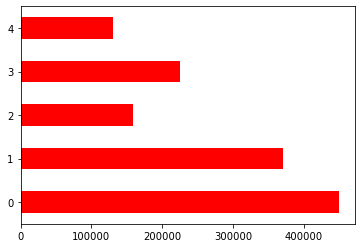

In [671]:
vehicleDf.selling_price[:5].plot(kind="barh", color='red') # We can plot by using the first 5 elements of our selling price column.

<AxesSubplot:ylabel='selling_price'>

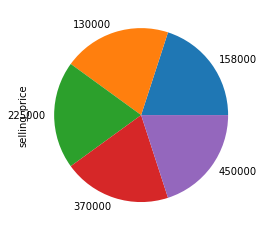

In [672]:
vehicleDf.selling_price[:5].value_counts().plot(kind='pie') # same things with pie

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

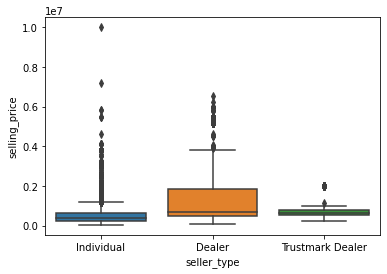

In [673]:
sns.boxplot( x=vehicleDf["seller_type"], y=vehicleDf["selling_price"] ) #hisplot

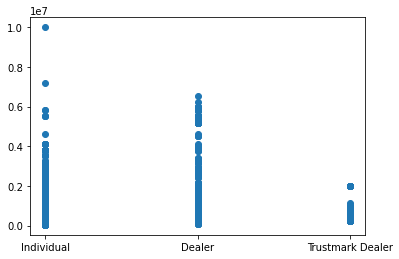

In [674]:
plt.scatter(vehicleDf['seller_type'], vehicleDf['selling_price']) # by using scatter

d)	Briefly explain your aim. Which machine learning model do you to decide and why?

Predicting prices using different vehicle features in my dataset. The machine learning model I will use is regression because my goal is prediction and foresight.Regression is a set of statistical approaches used to estimate the relationship between a dependent variable and one or more independent variables, what I will do is estimate price using tool features.







Step1: Exploratory Data Analysis

a)	Explain the shape of the dataset (restriction of at least 10 columns, 1000 rows)



In [676]:
vehicleDf.info() #info give me summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [677]:
vehicleDf.shape #my data set has 8128 rows × 13 columns

(8128, 13)

In [678]:
vehicleDf.shape[0] # returns number of rows


8128

In [679]:
vehicleDf.shape[1] # returns number of columns

13

b)	Explain the column types in the dataset

In [680]:
vehicleDf.dtypes #my dataset consists of numeric and object values

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [681]:
categorical_cols=[cname for cname in vehicleDf.columns if vehicleDf[cname].dtypes=='object'] #in my data set's columns whichs are equal 'object'
numerical_cols=[cname for cname in vehicleDf.columns if vehicleDf[cname].dtypes!='object'] # whichs are not equal 'object'

In [682]:
print('Categorical features:',categorical_cols,'\n') #print my categorical and numerical columns
print('Numerical features:',numerical_cols)

Categorical features: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'] 

Numerical features: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']


In [683]:
numeric = vehicleDf.select_dtypes(include=np.number) # to see my numerical columns with frame
numeric

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248.0,74.00,5.0
1,2014,370000,120000,21.14,1498.0,103.52,5.0
2,2006,158000,140000,17.70,1497.0,78.00,5.0
3,2010,225000,127000,23.00,1396.0,90.00,5.0
4,2007,130000,120000,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,23.57,1396.0,70.00,5.0


In [684]:
numCol = numeric.columns #my numeric columns 
numCol

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [685]:
obj = vehicleDf.select_dtypes(include=np.object) # to see my object columns with frame
obj

,name,fuel,seller_type,transmission,owner,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)"
...,...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,113.7Nm@ 4000rpm
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,"24@ 1,900-2,750(kgm@ rpm)"
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner,140Nm@ 1800-3000rpm


In [686]:
objCol = obj.columns #my obj columns 
objCol

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'], dtype='object')

c)	Explain the distribution of only 2 features in your dataset (one numeric, one categorical) using visualizations

In [687]:
corr = vehicleDf.corr() # calculate correlation matrix
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.227336
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.452085
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.610309
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.191999
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,1.000000


<AxesSubplot:>

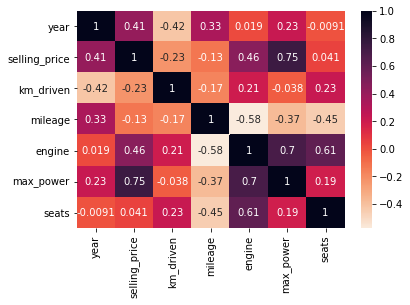

In [688]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, # heatmap has given us great insights into the data.
            annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

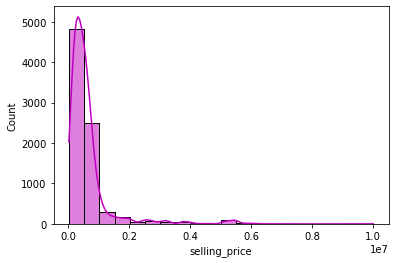

In [689]:
sns.histplot(data=vehicleDf, x='selling_price',bins=20, kde=True, color="m") # for my numeric column 'selling_price'


<AxesSubplot:xlabel='fuel', ylabel='Count'>

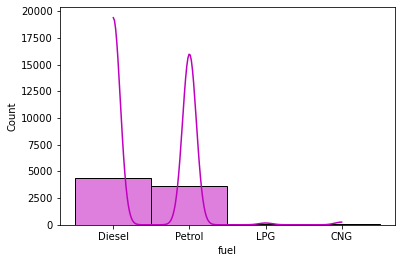

In [690]:
sns.histplot(data=vehicleDf, x='fuel',bins=20, kde=True, color="m") # for my categorical column 'fuel' 
#it seems that the diesel has the highest value in the fuel type.

Text(0.5, 1.0, 'Distribution fuel type')

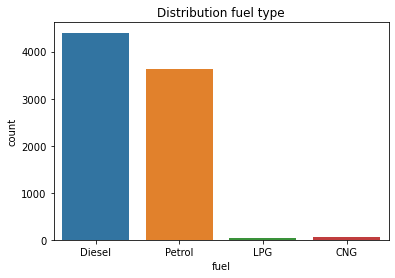

In [691]:
sns.countplot(x='fuel', data=vehicleDf) # also with a different visualization
plt.xlabel('fuel')
plt.title('Distribution fuel type')

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

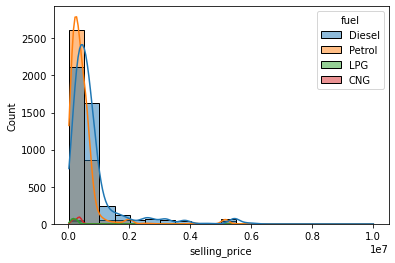

In [692]:
sns.histplot(data=vehicleDf, x='selling_price', hue="fuel",bins=20, kde=True, color="m") #also visualization with one numeric one categorically together

Step2: Preprocessing 

a)	How many columns include missing values

<AxesSubplot:>

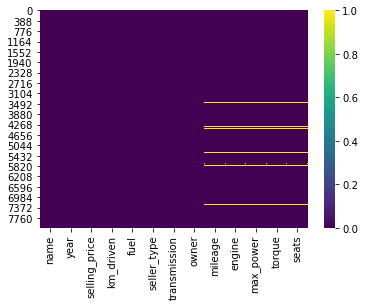

In [693]:
sns.heatmap(vehicleDf.isnull(), cmap='viridis') #using heap map, seeing my null columns

In [694]:
vehicleDf.isna() #isna() show me columns situation about NaN values

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False,False,False


In [695]:
vehicleDf.isna().sum().sort_values(ascending=False) #total number of NaN values and sorted

torque           222
seats            221
engine           221
mileage          221
max_power        216
owner              0
transmission       0
seller_type        0
fuel               0
km_driven          0
selling_price      0
year               0
name               0
dtype: int64

In [696]:
# Calculate the percentage of missing values for each column
missingPercentages = vehicleDf.isna().sum().sort_values(
    ascending = False)/len(vehicleDf)*100
missingPercentages

torque           2.731299
seats            2.718996
engine           2.718996
mileage          2.718996
max_power        2.657480
owner            0.000000
transmission     0.000000
seller_type      0.000000
fuel             0.000000
km_driven        0.000000
selling_price    0.000000
year             0.000000
name             0.000000
dtype: float64

In [697]:
# just see to my missing values
missingPercentages[missingPercentages != 0] #my 5 columns have missing values

torque       2.731299
seats        2.718996
engine       2.718996
mileage      2.718996
max_power    2.657480
dtype: float64

<AxesSubplot:>

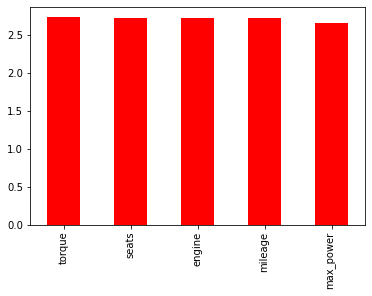

In [698]:
missingPercentages[missingPercentages != 0].plot(kind='bar', color='red') #also i visualized it with plot, my missing values

b)	Explain your method to handle each of those missing values

i can handle my missing values like; chechk my which columns have missing values (i did before), 
calculate total number of NaN values,i calculate my each columns's mean, and with fillna(), i fill my each columns, columns's mean

In [700]:
# firslt see my numeric columns with dataframe
numeric = vehicleDf.select_dtypes(include=np.number)
numeric

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248.0,74.00,5.0
1,2014,370000,120000,21.14,1498.0,103.52,5.0
2,2006,158000,140000,17.70,1497.0,78.00,5.0
3,2010,225000,127000,23.00,1396.0,90.00,5.0
4,2007,130000,120000,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,23.57,1396.0,70.00,5.0


In [701]:
numeric.isna().sum() #in my numeric columns, calculate total number of NaN values

year               0
selling_price      0
km_driven          0
mileage          221
engine           221
max_power        216
seats            221
dtype: int64

In [702]:
numeric.mean() # i can fill it with columns mean, for this i calculate mean my columns

year               2013.804011
selling_price    638271.807702
km_driven         69819.510827
mileage              19.418783
engine             1458.625016
max_power            91.517919
seats                 5.416719
dtype: float64

In [703]:
vehicleDf = vehicleDf.fillna(numeric.mean()) #with fillna(), i fill my columns, columns's mean
vehicleDf.describe().T


,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.000000,2017.0000,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.000000,675000.0000,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.000000,98000.0000,2360457.0
mileage,8128.0,19.418783,3.981875,0.0,16.8,19.418783,22.2775,42.0
engine,8128.0,1458.625016,497.017504,624.0,1197.0,1248.000000,1582.0000,3604.0
max_power,8128.0,91.517919,35.343246,0.0,68.1,83.100000,101.2500,400.0
seats,8128.0,5.416719,0.946450,2.0,5.0,5.000000,5.0000,14.0


In [704]:
# Calculate the percentage of missing values for each column
missingPercentages = vehicleDf.isna().sum().sort_values(
    ascending = False)/len(vehicleDf)*100
missingPercentages

torque           2.731299
seats            0.000000
max_power        0.000000
engine           0.000000
mileage          0.000000
owner            0.000000
transmission     0.000000
seller_type      0.000000
fuel             0.000000
km_driven        0.000000
selling_price    0.000000
year             0.000000
name             0.000000
dtype: float64

c)	Explain if you needed to apply any kind of transformations.

Sayısal olarak toplanan verilerin ölçekleri çoğunlukla birbirinden farklıdır. Bu farklılığı bazı makine öğrenmesi algoritmaları sevmez ve veri dönüşümü yapılmadan uygulandığında iyi performans gösteremez. Aynı zamanda farklı ölçeklere sahip değişkenleri model sonunda birbiriyle karşılaştırmamız doğru olmaz çünkü iki değişkenin konuşma dili aynı değildir.
Benim veri setimde de numerik kolonlarımda hepsi farklı birimlere sahip, bu yüzden standart scaler uyguladım, Bir dönüşüm uygulayarak bu değişkenleri aynı metriğe getirmiş oluruz böylelikle artık hem karşılaştırma yapabiliriz hem de algoritmalardan daha iyi performans ede edebiliriz.

Standard Scaler
Değişkenleri, ortalaması 0 std sapması 1 olan bir dağılıma çeviriyor . 
Veri setindeki tüm verilerden ilgili sütun ortalaması çıkartılıp yine sütun std sapmasına bölünerek bulunuyor. 
Böylelikle veri setindeki tüm gözlem birimleri -1 ile 1 arasında değer almış oluyor. z = (x — u) / s

In [711]:
numeric

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248.0,74.00,5.0
1,2014,370000,120000,21.14,1498.0,103.52,5.0
2,2006,158000,140000,17.70,1497.0,78.00,5.0
3,2010,225000,127000,23.00,1396.0,90.00,5.0
4,2007,130000,120000,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,23.57,1396.0,70.00,5.0


In [1098]:
feature_cols = ['year','km_driven','mileage','engine','max_power','seats']

X = vehicleDf[feature_cols]

In [1099]:
y = vehicleDf['selling_price']

In [1100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vehicleDf[feature_cols] = scaler.fit_transform(X.values)

vehicleDf

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,0.048464,450000,1.338363,Diesel,Individual,Manual,First Owner,0.999896,-0.423804,-0.495682,190Nm@ 2000rpm,-0.440324
1,Skoda Rapid 1.5 TDI Ambition,0.048464,370000,0.887411,Diesel,Individual,Manual,Second Owner,0.432289,0.079227,0.339607,250Nm@ 1500-2500rpm,-0.440324
2,Honda City 2017-2020 EXi,-1.929775,158000,1.241098,Petrol,Individual,Manual,Third Owner,-0.431678,0.077215,-0.382499,"12.7@ 2,700(kgm@ rpm)",-0.440324
3,Hyundai i20 Sportz Diesel,-0.940656,225000,1.011202,Diesel,Individual,Manual,First Owner,0.899435,-0.126009,-0.042951,22.4 kgm at 1750-2750rpm,-0.440324
4,Maruti Swift VXI BSIII,-1.682495,130000,0.887411,Petrol,Individual,Manual,First Owner,-0.833524,-0.323198,-0.093883,"11.5@ 4,500(kgm@ rpm)",-0.440324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,-0.198816,320000,0.710567,Petrol,Individual,Manual,First Owner,-0.230756,-0.526422,-0.245265,113.7Nm@ 4000rpm,-0.440324
8124,Hyundai Verna CRDi SX,-1.682495,135000,0.869726,Diesel,Individual,Manual,Fourth & Above Owner,-0.657716,0.069167,0.522963,"24@ 1,900-2,750(kgm@ rpm)",-0.440324
8125,Maruti Swift Dzire ZDi,-1.187935,382000,0.887411,Diesel,Individual,Manual,First Owner,-0.029833,-0.423804,-0.498511,190Nm@ 2000rpm,-0.440324
8126,Tata Indigo CR4,-0.198816,290000,-0.792605,Diesel,Individual,Manual,First Owner,1.042592,-0.126009,-0.608864,140Nm@ 1800-3000rpm,-0.440324


In [1092]:
vehicleDf.describe()


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8.128000e+03,8.128000e+03,8.128000e+03,8.128000e+03,8.128000e+03,8.128000e+03,8.128000e+03
mean,-1.378422e-16,6.382718e+05,2.985910e-17,1.733084e-16,1.148059e-17,-6.933430e-17,1.349670e-16
std,1.000062e+00,8.062534e+05,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-7.617213e+00,2.999900e+04,-1.234697e+00,-4.877094e+00,-1.679370e+00,-2.589563e+00,-3.610257e+00
25%,-6.933756e-01,2.549990e+05,-6.157615e-01,-6.577164e-01,-5.264223e-01,-6.626262e-01,-4.403242e-01
50%,2.957441e-01,4.500000e+05,-1.736520e-01,-5.898606e-15,-4.238039e-01,-2.381908e-01,-4.403242e-01
75%,7.903040e-01,6.750000e+05,4.983545e-01,7.179764e-01,2.482459e-01,2.753759e-01,-4.403242e-01
max,1.532144e+00,1.000000e+07,4.050850e+01,5.671350e+00,4.316763e+00,8.728713e+00,9.069475e+00


Step3: Feature Engineering 

a)	Determine which features are the most valuable and whether you need to create a new feature?   


In [1093]:
feature_cols = ['year','km_driven','mileage','engine','max_power','seats']

In [1094]:
corr2 = vehicleDf.corr() # calculate correlation matrix
corr2

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.310383,0.017773,0.213282,-0.008623
selling_price,0.414092,1.000000,-0.225534,-0.125454,0.453567,0.744958,0.041161
km_driven,-0.418006,-0.225534,1.000000,-0.171426,0.203954,-0.037714,0.225172
mileage,0.310383,-0.125454,-0.171426,1.000000,-0.575831,-0.373586,-0.452085
engine,0.017773,0.453567,0.203954,-0.575831,1.000000,0.702152,0.610309
max_power,0.213282,0.744958,-0.037714,-0.373586,0.702152,1.000000,0.191435
seats,-0.008623,0.041161,0.225172,-0.452085,0.610309,0.191435,1.000000


<AxesSubplot:>

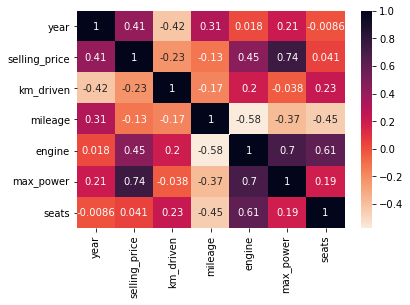

In [1095]:
sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, # heatmap has given us great insights into the data.
            annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

selling price ile en yüksek korolassyona sahip olan özelliki max_power, benim için en önemli özellik oluyor

b) Select (i.e., filter) or create features that make machine learning algorithms work

koralasyon sonucunda birbiriyle yakın koralasyona yakın olan özelliklerimde bir eleme yapabilirim fakat az sayıda, 6 tane numerik özelliğe sahip olduğum herhangi bir değişiklik yapmayacağım

c) Explain your aim in detail.

Verimi okudum, EDA adımlarını gerçekleştirdim yani bilgi sahibi oldum, eksik değerlerimi düzelttim ve transform yaptım, sonrasındaysa özelliklerimin labelım ile olan ilişkisini koralasyon matrisi ile inceledim. Veri setimdeki özellikleri kullanarak bir tahmin işlemi yapacağım için regresyon gerçekleştireceğim, en iyi sonucu alabilmek için makine öğrenme algoritmalarını karşılaştırıp, parametlerini tune etmem gerekiyor.

In [723]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Step4: Machine Learning Problem

a)	Select the machine learning problem (Regression, Classification or Clustering) that is appropriate for your data set.


benim seçtiğim machine learning problemi regresyon, regreson ile veri setimdkei araba özelliklerini kulanaraka satış tahmini yapmak

b)	Select 2 evaluation methods that you will use in your project, and explain them in detail by giving proper formulation.

$$MSE~(E) = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2 $$

[MSE] Ortalama Kare Hata  (Mean Squared Error):

Basitçe, ortalama kare hata bir regresyon eğrisinin bir dizi noktaya ne kadar yakın olduğunu söyler. MSE, bir makine öğrenmesi modelinin, tahminleyicinin performansını ölçer, her zaman pozitif değerlidir ve MSE değeri sıfıra yakın olan tahminleyicilerin daha iyi bir performans gösterdiği söylenebilir.

Mean Squared Error MSE (Ortalama Kare Hata)
Ortalama kare hata ME’de olduğu gibi gerçek değerler ile modelden çıkan değerler arasındaki farkın karesidir. Bu farkın karesinin alınmasının iki sebebi bulunmaktadır. Bunlardan ilki pozitif yönde değer elde etmek ikincisi ise hatanın büyüklüğünü kareli ifadeler ile gösterebilmek. Diğer metriklerde olduğu gibi sıfıra yaklaşması modelin doğruluğunu güçlendirmektedir.

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

[RMSE] Kök Ortalama Kare Hata (Root Mean Square Error):
Bir makine öğrenmesi modelinin, tahminleyicinin tahmin ettiği değerler ile gerçek değerleri arasındaki uzaklığın bulunmasında sıklıkla kullanılan, hatanın büyüklğünü ölçen kuadratik bir metriktir. RMSE tahmin hatalarının (kalıntıların) standart sapmasıdır. Yani, kalıntılar, regresyon hattının veri noktalarından ne kadar uzakta olduğunun bir ölçüsüdür; RMSE ise bu kalıntıların ne kadar yayıldığının bir ölçüsüdür. Başka bir deyişle, verilere en iyi uyan çizgi etrafında o verilerin ne kadar yoğun olduğunu söyler. RMSE değeri 0’dan ∞’a kadar değişebilir. Negatif yönelimli puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir. RMSE değerinin sıfır olması modelin hiç hata yapmadığı anlamına gelir. RMSE, büyük hataları daha fazla cezalandırmanın avantajına sahiptir, bu yüzden bazı durumlara daha uygun olabilir. RMSE, birçok matematiksel hesaplamada istenmeyen mutlak değerin kullanılmasını engeller.

Root Mean Squared Error RMSE (Karekök Ortalama Kare Hata)
Yukarıda bahsedilen MSE felsefesinin karekökünün alınmış halidir. Bu sayede kareler ile ortadan kaldırılan matematiksel riskler karekökü alınarak gerçek sonuçların yorumlanmasına katkıda bulunur.

R Square-R² (R-Kare)
bağımsız bir değişken veya bir regresyon modelindeki değişkenler tarafından açıklanan bağımlı bir değişkenin varyans oranını temsil eden istatistiksel bir ölçüdür. Bu ölçü ile bağımlı değişkenin açıklama oranı verilir. 0 ile 1 arasında olup 1'e yakın oldukça başarı oranı yüksek anlamına gelir.

Step5: Algorithms, Implementation and Performance Comparison                          
b)	Select 2 machine learning algorithm.                            
c)	Give brief definition of each of two algorithms along with the parameters need to be tuned.             
d)	Select your base evaluation technique. Explain why did you choose this method?                   
e)	Using your base evaluation technique as the quality criterion, try to find the best parameters for each of your machine learning method.                 
f)	Compare the two algorithms based on the selected evaluation technique, numerically and also visually.            
g)	Which algorithm performs the best? Can you explain why?                   


5. adımı gerçekleştirirken, aynı anda farklı algoritmaları görmek ve yorumlayabilmek için gridsearch ve pipeline kullandım

In [728]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [1105]:
feature_cols = ['year','km_driven','mileage','engine','max_power','seats']

X = vehicleDf[feature_cols]

X.head()

,year,km_driven,mileage,engine,max_power,seats
0,0.048464,1.338363,0.999896,-0.423804,-0.495682,-0.440324
1,0.048464,0.887411,0.432289,0.079227,0.339607,-0.440324
2,-1.929775,1.241098,-0.431678,0.077215,-0.382499,-0.440324
3,-0.940656,1.011202,0.899435,-0.126009,-0.042951,-0.440324
4,-1.682495,0.887411,-0.833524,-0.323198,-0.093883,-0.440324


In [730]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(8128, 6)


In [731]:
y = vehicleDf['selling_price']

y = vehicleDf.selling_price
y.head()


0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [732]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(8128,)


In [733]:
#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.30, random_state=42)

In [734]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

MultiModel GridSearchCV

algoritmalarımı çalıştırdığım zaman çok fazla vakit almadığını gördüğüm için, 3 tane machine larning algoritması seçtim bunlar; GradientBoostingRegressor(), RandomForestRegressor(),XGBRegressor() 

In [735]:
regressors = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    XGBRegressor()
]
models_names = ['Forest','Linear', 'XGBR']

yine farklı değelri de görebilmek için mse mae, rmse, score, değerini de hesaplattım

In [1227]:
scores = []
mse = []
mae = []
rmse= []

In [1228]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start 
    print(model)
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tMean squared error", mean_squared_error(y_test, fits.predict(X_test)))
    print("\tRMSE", np.sqrt(mean_squared_error(y_test, fits.predict(X_test))))
    print("\tR2 score:", r2_score(y_test, y_pred))
    scores.append(r2_score(y_test, y_pred))
    mse.append(mean_squared_error(y_test, fits.predict(X_test)))
    mae.append(mean_absolute_error(y_test, y_pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, fits.predict(X_test))))
    
    print()

GradientBoostingRegressor()
	Mean absolute error: 96986.32266945815
	Mean squared error 38794480953.610344
	RMSE 196963.14618123448
	R2 score: 0.9390998407808411

RandomForestRegressor()
	Mean absolute error: 74439.68611535551
	Mean squared error 38794480953.610344
	RMSE 196963.14618123448
	R2 score: 0.9529066713228602

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
	Mean absolute error: 73769.28793058438
	Mean squ

yukarıda elde ettiğimiz sonuçlara baktığımız zaman çok yakın değerler elde ettiğimiz gözüküyor ama yinede Random Forest algoritmasında score değeri diğerlerinden az da olsa daha iyi sonuç verdi, 3 machine algoritmasından bu algoritmayı seçebilirim

Text(0, 0.5, 'RMSE')

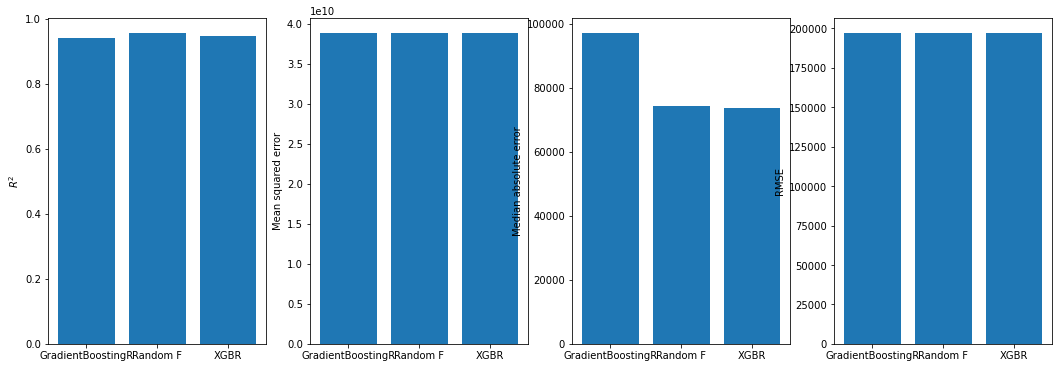

In [761]:
models_names = ['GradientBoostingR','Random F', 'XGBR']
f, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharex=True, sharey=False, figsize=(18,6))
ax1.bar(models_names, scores)
ax1.set_ylabel('$R^2$')
ax2.bar(models_names, mse)
ax2.set_ylabel('Mean squared error')
ax3.bar(models_names, mae)
ax3.set_ylabel('Median absolute error')
ax4.bar(models_names, rmse)
ax4.set_ylabel('RMSE')

Ayrıca hesapladığım değerleri görselleştirerek de, karşılaştırabilirim

In [762]:
model_params = {
    'xgb_regression': {
        'model':  XGBRegressor(),
        'params' : {
            "n_estimators" : [100, 200, 500],
            "max_depth" : [3, 6, 9],
            "gamma" : [0.01, 0.1],
            "learning_rate" : [0.01, 0.1, 1]
        }
    },
    'gradientboosting_regression' : {
        'model': GradientBoostingRegressor(),
        'params': { 'loss' : ['ls', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : [ 'mse', 'rmse'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }
    },
    'RandomForest_Regression': {
        'model':  RandomForestRegressor(),
        'params' : {
            "n_estimators" : [100, 200, 500],
            "max_depth" : [3, 6, 9],
            'criterion' : [ 'mse', 'rmse'],
           
        }
    }
}

In [763]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scoress = []

for model_name, mp in model_params.items():
    GS2 =  GridSearchCV(mp['model'], mp['params'], scoring=["r2"], refit='r2')
    GS2.fit(X, y)
    scoress.append({
        'model': model_name,
        'best_score': GS2.best_score_,
        'best_params': GS2.best_params_
    })
    

In [744]:
df = pd.DataFrame(scoress,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,xgb_regression,0.959392,"{'gamma': 0.01, 'learning_rate': 0.1, 'max_dep..."
1,gradientboosting_regression,0.956050,"{'criterion': 'mse', 'learning_rate': 0.25, 'l..."
2,RandomForest_Regression,0.959685,"{'criterion': 'mse', 'max_depth': 9, 'n_estima..."


Bu seferde yine3 algoritmamı onların tune edebileceğim özelliklerini vererek karışalştırdım, yine çok yakın sonuçlar elde ettim, aralarında fark yok denecek kadar az olsa yine Random forest algoritmasında daha iyi sonuç elde ettim, elde ettiğim sonuçlardan en iyi parametre sonuçlarını da seçmiş oldum

Text(0, 0.5, 'RMSE')

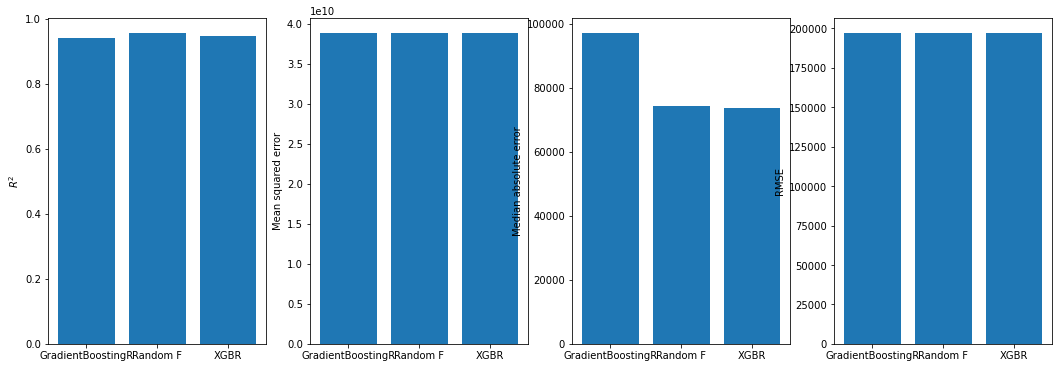

In [764]:
models_names = ['GradientBoostingR','Random F', 'XGBR']
f, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharex=True, sharey=False, figsize=(18,6))
ax1.bar(models_names, scores)
ax1.set_ylabel('$R^2$')
ax2.bar(models_names, mse)
ax2.set_ylabel('Mean squared error')
ax3.bar(models_names, mae)
ax3.set_ylabel('Median absolute error')
ax4.bar(models_names, rmse)
ax4.set_ylabel('RMSE')

In [765]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator = None):
        self.estimator = estimator
    
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self
    
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    
    def score(self, X, y):
        return self.estimator.score(X, y)

In [766]:
parameters = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
       
        "clf__estimator": [GradientBoostingRegressor()],
        "clf__estimator__criterion":  [ 'mse', 'rmse'],
        "clf__estimator__max_features" : ['auto', 'sqrt', 'log2'],
        "clf__estimator__loss" : ['ls', 'quantile'],
        "clf__estimator__learning_rate" : (0.05,0.25,0.50,1)
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        
        "clf__estimator": [RandomForestRegressor()],
        "clf__estimator__n_estimators" : [100, 200, 500],
        "clf__estimator__criterion":  [ 'mse', 'rmse'],
    },
    {
         'scaler': [StandardScaler(), MinMaxScaler()],
        
        "clf__estimator": [ XGBRegressor()],
        "clf__estimator__n_estimators" : [100, 200, 500],
        "clf__estimator__criterion":  [ 'mse', 'rmse'],
        "clf__estimator__max_depth" : [3, 6, 9],
    }
    
]

In [1109]:
search = GridSearchCV(pipe, parameters, cv=5, n_jobs=2)
search.fit(X, y)
print("Best parameter (score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (score=0.963):
{'clf__estimator': RandomForestRegressor(n_estimators=200), 'clf__estimator__criterion': 'mse', 'clf__estimator__n_estimators': 200, 'scaler': StandardScaler()}


Aynı şekilde pipeline kullanarak da 3 algoritmamı karşılaştırmak istedim bu sefer, scaler olarakta karşılaştırma yaptım, yine en iyi sonucu Random forest algoritmasında aldım

Karşılaştırmalarım sonucunda Random forest algoritmasının, standart scaler, ve kriter olarak 'mse' evaluationu kullanarak, estimater olarak=200 parametrelerimi tune ederek en iyi sonuca 0.963'e ulaştım

In [1185]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.30, random_state=42)

Step6: Further Performance Improvement (Your best algorithm)                     
a)	Remove outliers (if there are any) in your data. Check if this improved your algorithm’s performance. Show before and after performance of your algorithm (both visually and numerically)                                 
h)	Apply a feature selection method. Check if this improved your algorithm’s performance. Show before and after performance of your algorithm (both visually and numerically)                        
i)	Can you propose any other improvement techniques?


In [871]:
copy_df = vehicleDf.copy()

birkaç tane özellliğimdeki outlier, göstermek için boxplot ile gösterdim

<AxesSubplot:xlabel='mileage'>

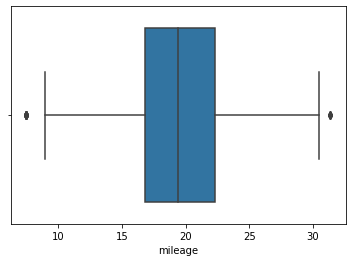

In [231]:
sns.boxplot(vehicleDf['mileage'])

<AxesSubplot:xlabel='max_power'>

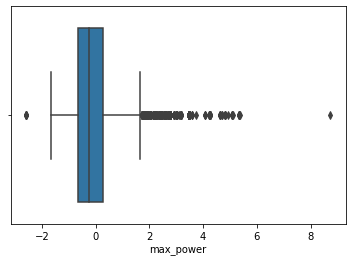

In [1219]:
sns.boxplot(vehicleDf['max_power'])

In [900]:
Q1 = copy_df.quantile(q=.25)
Q3 = copy_df.quantile(q=.75)
IQR = Q3 - Q1

data_clean = copy_df[~((copy_df < (Q1-1.5*IQR)) | (copy_df > (Q3+1.5*IQR))).any(axis=1)]

data_clean.shape

(5639, 13)

Outlierı tespit etmek için q1,q3ve iqr değerlerini hespladım daha sonrasındaysa bunrları sildim, benim veri setimde çok fazla outlier bulunduğu için veri setimde ciddi bir azalma oldu ve 5639'a kadar düşrü row değerim

aykırı değerlerimi sildikten sonra performansına etkisini görebilmek için yukarıda yaptığım gibi algoritmalarımda aynı şeyleri deneyeceğim

In [974]:
X_sc_out = sc.fit_transform(X_out)

In [975]:
X_out = data_clean[feature_cols]  
y_out = data_clean['selling_price']  
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_sc_out, y_out, test_size=0.30, random_state=42)

In [976]:
scores3=[]
mse3=[]
mae3=[]

In [977]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train_out, y_train_out)
    train_time = time() - start
    start = time()
    y_pred_out = model.predict(X_test_out)
    predict_time = time()-start 
    print(model)
    print("\tMean absolute error:", mean_absolute_error(y_test_out, y_pred_out))
    print("\tMean squared error", mean_squared_error(y_test_out, fits.predict(X_test_out)))
    print("\tR2 score:", r2_score(y_test_out, y_pred_out))
    scores3.append(r2_score(y_test_out, y_pred_out))
    mse3.append(mean_squared_error(y_test_out, fits.predict(X_test_out)))
    mae3.append(mean_absolute_error(y_test_out, y_pred_out))
    
    print()

GradientBoostingRegressor()
	Mean absolute error: 60447.76709459696
	Mean squared error 124198427261.914
	R2 score: 0.8682461546708055

RandomForestRegressor()
	Mean absolute error: 50887.01199949276
	Mean squared error 124198427261.914
	R2 score: 0.8987827745423127

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
	Mean absolute error: 49335.740728427896
	Mean squared error 124198427261.914
	R2 score: 0.906947323235

Burada yukarı da denediğim 3 algoritma üzerinde sonuçların etkisini gözlemlemek istedim, belki bazılarında performansı farklı yönde vaya daha az etkileyebilir diye. Fakat elde ettiğim sonuçlarda 3 algoritmamda da performan açısında düşüş olduğunu gördüm, özellikle skore değerimde 0.95lerden 0.90'a kadar düştü. Aykırı değerlerim varken ve sildikten sonraki performanslarını da grafikle gösterdim

Text(0, 0.5, 'Mean squared error')

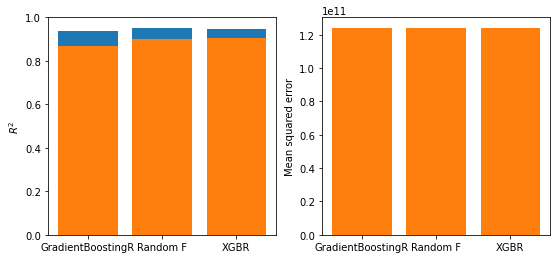

In [1238]:
models_names = ['GradientBoostingR','Random F', 'XGBR']
f, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=False, figsize=(9,4))
ax1.bar(models_names, scores)
ax1.bar(models_names, scores3)
ax1.set_ylabel('$R^2$')
ax2.bar(models_names, mse)
ax2.bar(models_names, mse3)
ax2.set_ylabel('Mean squared error')



In [980]:
search = GridSearchCV(pipe, parameters, cv=5, n_jobs=2)
search.fit(X_sc_out, y_out)
print("Best parameter ( score=%0.3f):" % search.best_score_)
print(search.best_params_)

[12:47:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best parameter ( score=0.913):
{'clf__estimator': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, criterion='mse',
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=6,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_we

In [957]:
regressor = RandomForestRegressor(n_estimators = 100, criterion ='mse', random_state = 0)
 
regressor.fit(X_train_out, y_train_out)
y_pred_out = model.predict(X_test_out)

In [985]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scoress3 = []

for model_name, mp in model_params.items():
    GS3 =  GridSearchCV(mp['model'], mp['params'], scoring=["r2"], refit='r2')
    GS3.fit(X_out, y_out)
    scoress3.append({
        'model': model_name,
        'best_score': GS3.best_score_,
        'best_params': GS3.best_params_
    })

In [986]:
df3 = pd.DataFrame(scoress3,columns=['model','best_score','best_params'])
df3

,model,best_score,best_params
0,xgb_regression,0.914561,"{'gamma': 0.01, 'learning_rate': 0.1, 'max_dep..."
1,gradientboosting_regression,0.904085,"{'criterion': 'mse', 'learning_rate': 0.5, 'lo..."
2,RandomForest_Regression,0.894860,"{'criterion': 'mse', 'max_depth': 9, 'n_estima..."


çok fazla aykırı değerim olduğu için ve hepsini sildiğim için başarı oranım düştü, ayrıca aykırı değerlerimi silmeden önce en iyi sonucu Random Forest'da alırken, aykırı değerlerimi temizledikten sonra en iyi sonucu xgb_regression algoritması verdi

FEATURE SELECTION

In [314]:
feature_cols = ['year','km_driven','mileage','engine','max_power','seats']
X = vehicleDf[feature_cols]


In [315]:
y = vehicleDf['selling_price']

In [317]:
vehicleDf.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.313885,0.017773,0.213282,-0.003507
selling_price,0.414092,1.000000,-0.225534,-0.131148,0.453567,0.744958,0.046756
km_driven,-0.418006,-0.225534,1.000000,-0.174502,0.203954,-0.037714,0.226640
mileage,0.313885,-0.131148,-0.174502,1.000000,-0.585133,-0.383023,-0.468474
engine,0.017773,0.453567,0.203954,-0.585133,1.000000,0.702152,0.617509
max_power,0.213282,0.744958,-0.037714,-0.383023,0.702152,1.000000,0.205606
seats,-0.003507,0.046756,0.226640,-0.468474,0.617509,0.205606,1.000000


<AxesSubplot:>

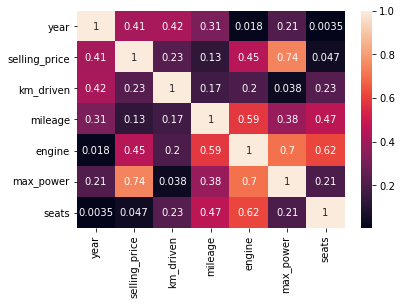

In [318]:
sns.heatmap(vehicleDf.corr().abs(), annot= True)


renkler açıldıkça aralarındaki kor yükselir

In [319]:
vehicleDf.corr().abs()['selling_price'].nlargest(5)

selling_price    1.000000
max_power        0.744958
engine           0.453567
year             0.414092
km_driven        0.225534
Name: selling_price, dtype: float64

mutlak değerde labelıma göre en yüksek kororasyon olanı özelliklerim

birbiriyle yüksek koralasyona sahip veriler zaten aynı şeyi verir bunlardan herhangi birini atabiliriz, 
sellin_price labelım ile en yüksek korolasyona sahip olan özelliğim max_power, sonrasında engine ve year ikiside çok yakın kor sahip ikisinden birini atabilirim                      
özelliklerin birbirleriyle olan kor bakarsam engine ve max_power arasında, labelımın engine ve year arasındaki kor daha yüksek kor var ve bu ikisinden de birini atabilirim

koralasyon değerlerine göre feature selection yapabilirim fakat, başka bir yöntem daha deneyerek kaç tane özellik kullanmalıyım buna da bakacağım

In [321]:
from sklearn.feature_selection import VarianceThreshold

In [323]:
sel = VarianceThreshold()
sel.fit(X)
sel.transform(X)

array([[2.0140e+03, 1.4550e+05, 2.3400e+01, 1.2480e+03, 7.4000e+01,
        5.0000e+00],
       [2.0140e+03, 1.2000e+05, 2.1140e+01, 1.4980e+03, 1.0352e+02,
        5.0000e+00],
       [2.0060e+03, 1.4000e+05, 1.7700e+01, 1.4970e+03, 7.8000e+01,
        5.0000e+00],
       ...,
       [2.0090e+03, 1.2000e+05, 1.9300e+01, 1.2480e+03, 7.3900e+01,
        5.0000e+00],
       [2.0130e+03, 2.5000e+04, 2.3570e+01, 1.3960e+03, 7.0000e+01,
        5.0000e+00],
       [2.0130e+03, 2.5000e+04, 2.3570e+01, 1.3960e+03, 7.0000e+01,
        5.0000e+00]])

In [324]:
sel.fit_transform(X)

array([[2.0140e+03, 1.4550e+05, 2.3400e+01, 1.2480e+03, 7.4000e+01,
        5.0000e+00],
       [2.0140e+03, 1.2000e+05, 2.1140e+01, 1.4980e+03, 1.0352e+02,
        5.0000e+00],
       [2.0060e+03, 1.4000e+05, 1.7700e+01, 1.4970e+03, 7.8000e+01,
        5.0000e+00],
       ...,
       [2.0090e+03, 1.2000e+05, 1.9300e+01, 1.2480e+03, 7.3900e+01,
        5.0000e+00],
       [2.0130e+03, 2.5000e+04, 2.3570e+01, 1.3960e+03, 7.0000e+01,
        5.0000e+00],
       [2.0130e+03, 2.5000e+04, 2.3570e+01, 1.3960e+03, 7.0000e+01,
        5.0000e+00]])

In [325]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


kaç tane özellik seçmem gerektiğini bu metot bana kendisi söylüyor deneyerek

In [328]:
estimator = SGDRegressor()
selector = SelectFromModel(estimator)
selector = selector.fit(X, y) 

In [334]:
selector.transform(X).shape

(8128, 2)

2 özellik benim için yeterli olduğunun sonucunu aldım buna göre performansıma etkisne bakacağım

In [1222]:
feature_cols = ['engine','max_power']
newX = vehicleDf[feature_cols]

In [1223]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(newX, y, test_size=0.30, random_state=42)

bu sefer X değerimi koralasyonlarına göre sadece 2 tane özellik seçtim

In [1224]:
scores2=[]
mse2=[]
mae2=[]

In [1225]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train_new, y_train_new)
    train_time = time() - start
    start = time()
    y_pred_new = model.predict(X_test_new)
    predict_time = time()-start 
    print(model)
    print("\tMean absolute error:", mean_absolute_error(y_test_new, y_pred_new))
    print("\tR2 score:", r2_score(y_test_new, y_pred_new))
    scores2.append(r2_score(y_test_new, y_pred_new))
    mae2.append(mean_absolute_error(y_test_new, y_pred_new))
    
    print()

GradientBoostingRegressor()
	Mean absolute error: 181297.94301058422
	R2 score: 0.8526303353207964

RandomForestRegressor()
	Mean absolute error: 128370.93854081587
	R2 score: 0.8807822903913203

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
	Mean absolute error: 125076.98595575799
	R2 score: 0.8900307094548825



Text(707.7382352941178, 0.5, 'Median absolute error')

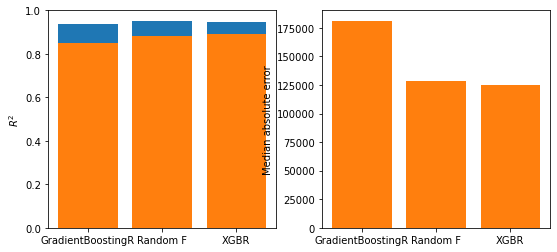

In [1235]:
models_names = ['GradientBoostingR','Random F', 'XGBR']
f, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=False, figsize=(9,4))
ax1.bar(models_names, scores)
ax1.set_ylabel('$R^2$')
ax1.bar(models_names, scores2)
ax1.set_ylabel('$R^2$')
ax2.bar(models_names, mae)
ax2.set_ylabel('Median absolute error')
ax2.bar(models_names, mae2)
ax3.set_ylabel('Median absolute error')

In [1018]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scoress4 = []

for model_name, mp in model_params.items():
    GS4 =  GridSearchCV(mp['model'], mp['params'], scoring=["r2"], refit='r2')
    GS4.fit(newX, y)
    scoress4.append({
        'model': model_name,
        'best_score': GS4.best_score_,
        'best_params': GS4.best_params_
    })

In [1019]:
df4 = pd.DataFrame(scoress4,columns=['model','best_score','best_params'])
df4

,model,best_score,best_params
0,xgb_regression,0.895865,"{'gamma': 0.01, 'learning_rate': 0.01, 'max_de..."
1,gradientboosting_regression,0.888420,"{'criterion': 'mse', 'learning_rate': 0.5, 'lo..."
2,RandomForest_Regression,0.888244,"{'criterion': 'mse', 'max_depth': 9, 'n_estima..."


özellik seçimini çok fazla azalttığım için, performans olarak daha kötü sonuçlar elde ettim

<BarContainer object of 1 artists>

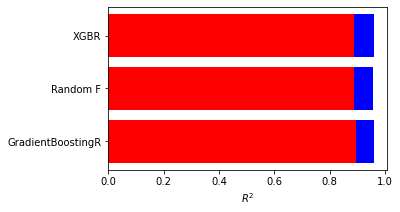

In [1066]:
models_names = ['GradientBoostingR','Random F', 'XGBR']
f, (ax1) = plt.subplots(ncols=1, sharex=True, sharey=False, figsize=(5,3))
ax1.barh('GradientBoostingR', df.best_score[0], color = 'b')
ax1.barh('GradientBoostingR', df4.best_score[0], color = 'r')
ax1.set_xlabel('$R^2$')
ax1.barh('Random F', df.best_score[1], color = 'b')
ax1.barh('Random F', df4.best_score[1], color = 'r')
ax1.barh('XGBR', df.best_score[2], color = 'b')
ax1.barh('XGBR', df4.best_score[2], color = 'r')



Can you propose any other improvement techniques?

data setimde numerik özelliklerim üzerinden bir regresyon gerçekleştirdim, numerik olmayan değerlerim üzerinde bir transform yapsaydım, belki daha da iyi bir sonuç elde edebilirdim

Step7: Inference
Give comments on your findings. Did you achieve your goal in the project?


Projemde verilerimi analiz okudum, analiz ettim, train ve test değerlerimi oluşturudum, ve farklı algoritmalarda deneyerek, hata sonuçlarımı, ve en iyi skorlarımı hesapladım, hesapladığım sonuçlardan ve denediğim algoritmalardan, algoritmalarımın tune etmem gereken parametlererini bulduktan sonra 0.95-0.96 gibi bir sonuç elde ettim, buda bir makine öğrenmesi için iyi bir sonuç, bu yüzden bu projede amacıma ulaştım diyebilirim